<a href="https://colab.research.google.com/github/virb30/airbnb-lisboa/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_Grande_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Grande Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à Grande Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Características geográficas

Antes de começarmos nossa análise, é importante que conheçamos brevemente as características da cidade e do conjunto de dados que estamos utilizando.

Semelhante ao que ocorre com a Grande São Paulo no Brasil - que é composta de vários municípios -, Lisboa (Distrito de Lisboa ou Grande Lisboa) também é composta por mais de um munícipio - denominados conselhos. São eles: 
1. Alenquer, 
2. Amadora, 
3. Arruda dos Vinho, 
4. Azambuja, 
5. Cadaval, 
6. Cascais, 
7. Lisboa, 
8. Loures, 
9. Lourinhã, 
10. Mafra, 
11. Odivelas, 
12. Oeiras, 
13. Sintra, 
14. Sobral de Monte Agraço, 
15. Torres Vedras e 
16. Vila Franca de Xira.


## Obtenção dos Dados

Os dados estão disponíveis no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise utilizamos o arquivo `listings.csv` que contém informações resumidas e métricas para a cidade de lisboa.

Como o portal está em constante evolução, existe a possibilidade do conjunto de dados que utilizamos não estar disponível, ou ter sofrido alterações em sua estrutura, o que quebraria nossa análise. 

Pensando nisso, disponibilizamos o conjunto de dados utilizado nessa análise [aqui](https://drive.google.com/u/0/uc?id=1tS_amtElDIVF918jAeQgSqrEZnBGATv2&export=download).

In [27]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
DATASET = 'https://drive.google.com/u/0/uc?id=1tS_amtElDIVF918jAeQgSqrEZnBGATv2&export=download'

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(DATASET)

# ver quantidade de registros
df.shape

(19458, 16)

## Análise dos Dados

Nessa etapa iremos entender como os dados estão estruturados e quais características nos chamam mais atenção.

Segundo sua documentação as variáveis estão divididas da seguinte maneira:

**Dicionário das variáveis**

* `id` - identificador único do airbnb
* `name` - descrição do imóvel
* `host_id` - código do proprietário (anfitrião) do imóvel
* `host_name` - nome do anfitrião
* `neighbourhood_group` - grupo do bairro (em nosso caso representa o conselho)
* `neighbourhood` - nome do bairro
* `latitude` - latitude do imóvel
* `longitude` - longitude do imóvel
* `room_type` - tipo de quarto
* `price` - preço da diária em moeda local (no caso, euros)
* `minimum_nights` - número mínimo de noites
* `number_of_reviews` - quantidade de reviews
* `last_review` - data da última review
* `reviews_per_month` - média de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do host na mesma região
* `availability_365` - quantidade de dias disponíveis nos próximos 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2020-11-26,2.74,1,303
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,2020-03-11,0.84,1,349


Também é interessante verificarmos quais valores únicos a variável neighbourhood_group possui.

In [5]:
df.neighbourhood_group.unique()

array(['Lisboa', 'Cascais', 'Sintra', 'Alenquer', 'Vila Franca De Xira',
       'Mafra', 'Torres Vedras', 'Lourinh', 'Oeiras', 'Cadaval',
       'Amadora', 'Arruda Dos Vinhos', 'Loures', 'Odivelas', 'Azambuja',
       'Sobral De Monte Agrao'], dtype=object)

Conforme dissemos anteriormente, o Distrito de Lisboa é composto por 16 munícipios, o que nos leva à conclusão de que os dados contidos nesse *Dataset* referem-se à Grande Lisboa e não somente à cidade-capital Lisboa.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


O arquivo que importamos possui 19458 registros e 16 variáveis. Vale ressaltar que o `listings.csv` é uma versão "resumida" dos dados do Airbnb. A versão completa `listings.csv.gz` - que possui 106 variáveis - também está disponível no portal Inside Airbnb.

In [6]:
# identificar o volume de dados do DataFrame
print(f'Registros:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Registros:	19458
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Verificando o percentual de dados ausentes em nosso dataset, podemos perceber que:

* Temos 18% de dados ausentes nos campos de review (`reviews_per_month` e `last_review`);
* A variável `host_name` possui pouco mais de 0,1% de valores ausentes e
* A variável `name` possui 0,05% de valores ausentes.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183626
last_review                       0.183626
host_name                         0.001079
name                              0.000514
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Verificando a distribuição das variáveis, podemos ver que temos alguns *outliers* para as variáveis `price`e `minimum_nights`. 

Esses *outliers* podem ser tanto valores reais quanto erros de digitação e serão tratados mais adiante.

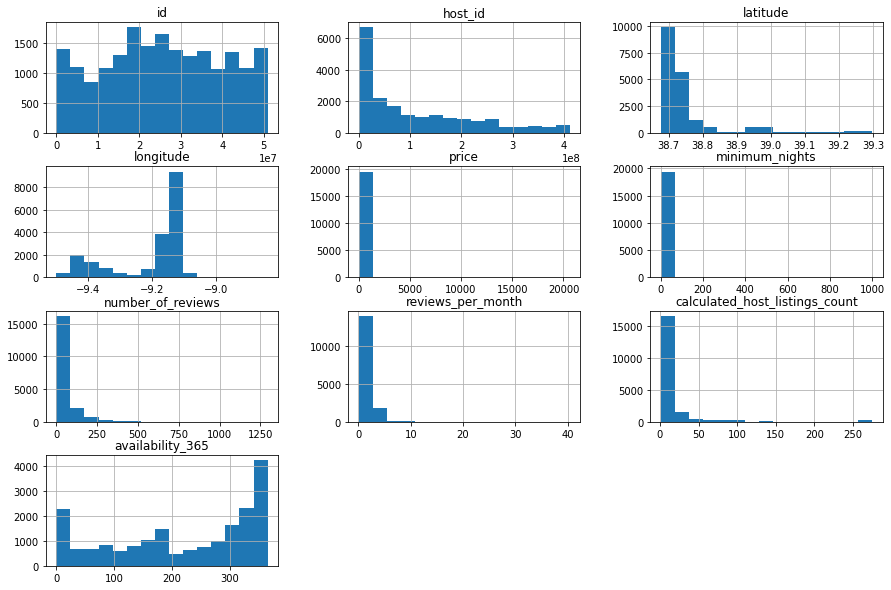

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos ver que a média dos preços de aluguel é &euro; 108,00.



In [9]:
# descrever variáveis numéricas relevantes
df[['price', 'minimum_nights', 'availability_365']].describe()

,price,minimum_nights,availability_365
count,19458.000000,19458.000000,19458.000000
mean,108.296022,3.850396,218.978878
std,281.433465,16.737444,125.645147
min,0.000000,1.000000,0.000000
25%,50.000000,1.000000,113.000000
50%,72.000000,2.000000,251.000000
75%,110.000000,3.000000,335.000000
max,20628.000000,1000.000000,365.000000


Além disso, pelo resumo acima vemos que:

* a variável `price` possui 75% dos valores abaixo de 110,00. porém seu valor máximo é &euro; 20628,00.
* a variável `minimum_nights` possui valores acima de 365 dias

### Limpeza dos dados

Antes de prosseguirmos, iremos realizar um tratamento nos dados para identificar e remover os *outliers* de maneira que não atrapalhem nossa análise.

Trataremos as variáveis `price` e `minimum_nights`.



#### Identificar ponto de corte de `price`

Iremos utilizar o boxplot para identificarmos o melhor ponto de corte para eliminarmos os *outliers* sem prejudicar nosso conjunto de dados.

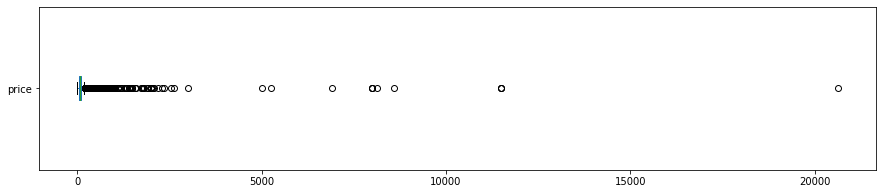

price: valores acima de 600:
189 entradas
0.9713%


In [10]:
# plotar boxplot para price
df.price.plot(kind="box", vert=False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 600
print("price: valores acima de 600:")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0]) * 100))

Podemos ver que valores de `price`acima de &euro; 600 representam menos de 1% do dataset, portanto utilizaremos esse valor como corte.

#### Identificar outliers de `minimum_nights`

Repetiremos o processo da variável `price` para a variável `minimum_nights` no entanto, utilizaremos arbitrariamente o valor de 30 dias (que é período médio de férias).

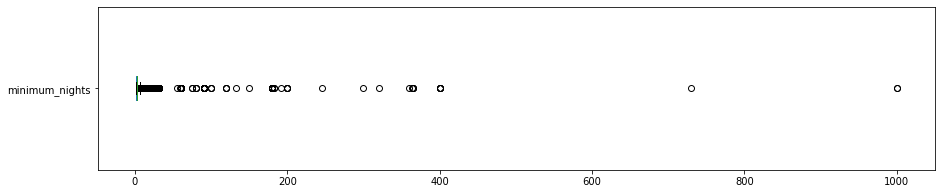

minimum_nights: valores acima de 30:
95 entradas
0.4882%


In [11]:
# plotar boxplot para minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 30
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

Vemos que a quantidade de registros com a variável `minimum_nights` acima de acima de 30 dias representa 0,49% do dataset, então utilizaremos esse valor para realizar a limpeza:

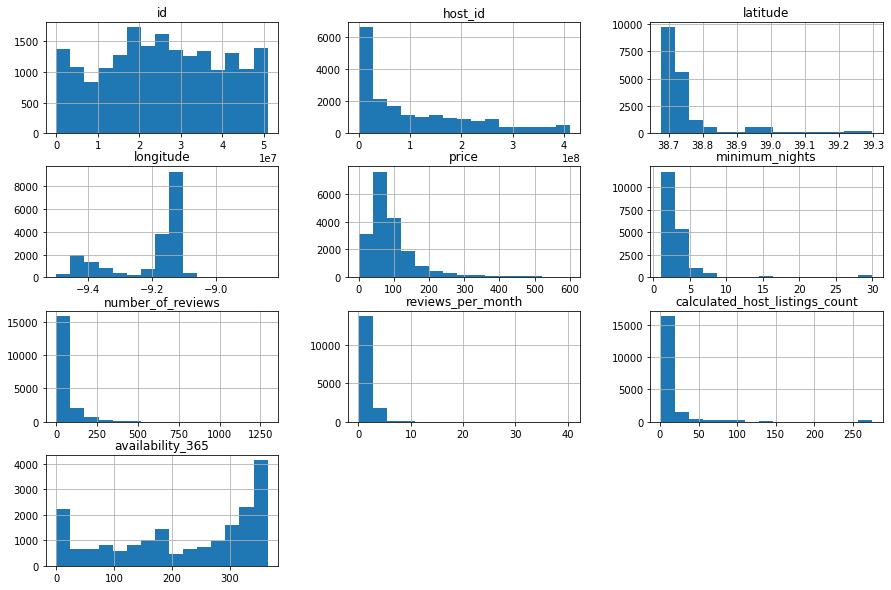

In [12]:
# copiar o dataframe original
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# verificar histogramas dos dados limpos
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Agora vamos verificar qual a correlação das variáveis do nosso conjunto de dados, ou seja o quanto uma variável afeta outra.

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.026472,-0.126022,-0.132484,0.023722,0.058599
minimum_nights,-0.026472,1.000000,-0.067330,-0.098115,-0.045799,-0.067761
number_of_reviews,-0.126022,-0.067330,1.000000,0.739947,-0.086769,-0.007991
reviews_per_month,-0.132484,-0.098115,0.739947,1.000000,-0.063195,0.023153
calculated_host_listings_count,0.023722,-0.045799,-0.086769,-0.063195,1.000000,0.046659
availability_365,0.058599,-0.067761,-0.007991,0.023153,0.046659,1.000000


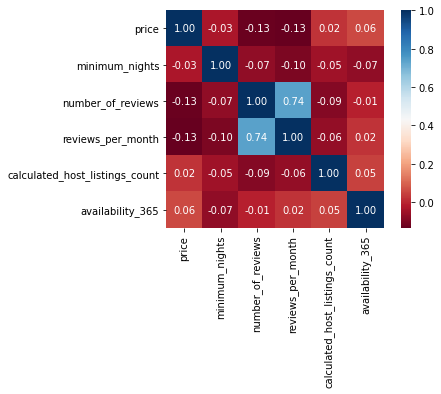

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com exceção das variáveis `number_of_reviews` e `reviews_per_month` nossas variáveis numéricas não são relacionadas entre si.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Em nosso *dataset* a variável `room_type` indica qual o tipo do imóvel que está anunciado no Airbnb e as opções são apartamentos/casas inteiras, quarto de hotal, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vemos que em Lisboa a preferência de aluguel via Airbnb é para apartamentos/casas inteiras.

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14254
Private room        4217
Hotel room           361
Shared room          342
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.732552
Private room       0.216723
Hotel room         0.018553
Shared room        0.017576
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Devido a natureza do Distrito de Lisboa, iremos verificar qual dos conselhos (municípios) e quais os bairros do conselho de Lisboa são os mais caros. Começando pelos municípios:


In [17]:
# ver preços por conselho, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Azambuja                 143.000000
Arruda Dos Vinhos        135.500000
Lourinh                  125.384416
Cascais                  124.880776
Sintra                   121.676784
Torres Vedras            120.040984
Mafra                    117.861063
Cadaval                  107.451613
Alenquer                  97.117647
Sobral De Monte Agrao     94.375000
Lisboa                    85.588266
Oeiras                    81.232394
Vila Franca De Xira       80.869565
Loures                    68.370079
Odivelas                  51.555556
Amadora                   42.857143
Name: price, dtype: float64

In [18]:
# ver quantidade de imóveis por conselho
df_clean.neighbourhood_group.value_counts()

Lisboa                   13584
Cascais                   1753
Sintra                    1219
Mafra                     1166
Lourinh                    385
Oeiras                     284
Torres Vedras              244
Loures                     127
Amadora                    119
Odivelas                    81
Alenquer                    68
Cadaval                     62
Vila Franca De Xira         46
Sobral De Monte Agrao       16
Azambuja                    14
Arruda Dos Vinhos            6
Name: neighbourhood_group, dtype: int64

Alguns municípios possuem poucos imóveis disponíveis o que pode elevar a média dos aluguéis. Se analisarmos Azambuja, por exemplo, existem apenas 14 imóveis cadastrados, enquanto que Lisboa possui mais de 13000 registros.

Também iremos verificar a os barrios mais caros no conselho de Lisboa.

In [19]:
# extrair média de preço do município de Lisboa por bairro
df_clean[df_clean.neighbourhood_group == 'Lisboa'].groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Parque das Naes           113.740260
Santa Maria Maior          95.223933
Misericrdia                94.831466
Santo Antnio               93.788043
Lumiar                     91.850000
So Domingos de Benfica     85.551181
Estrela                    84.483703
Belm                       83.637736
Ajuda                      83.453846
So Vicente                 83.074286
Name: price, dtype: float64

(231, 16)


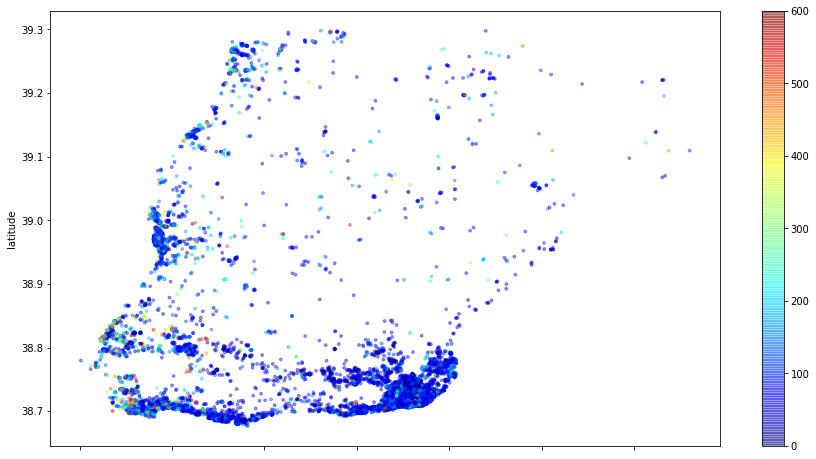

In [32]:
# ver quantidade de imóveis no Parque das Naes
print(df_clean[df_clean.neighbourhood == "Parque das Naes"].shape)

# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Verificamos também que a média do número mínimo de noites é 3.

In [22]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.0905392719307394

## Conclusões

Foi realizada uma análise genérica dos dados do Airbnb para a Grande Lisboa. O objetivo principal era ter uma visão geral sobre o conjunto de dados e gerar *insights* para análises mais aprofundadas.

Notamos que algumas localidades possuem poucos imóveis disponíveis, o que pode provocar distorções na média dos preços. Além disso vemos também que a maior concentração de imóveis está nas áreas litorâneas (e banhadas pelo rio Tejo) e no centro comercial.

A maneira como a Grande Lisboa é dividida nos possibilida ter várias interpretações de diferentes pontos de vista. Poderíamos, por exemplo, tanto ter pautado nossas análises somente nos municípios (cidades e vilas) que a compõe, quanto direcioná-las para uma cidade específica, como, por exemplo, a cidade-capital Lisboa.

Com um objetivo mais específico, poderiamos melhorar a etapa de limpeza dos dados ou remover variáveis que talvez fossem irrelevantes, por exemplo. Além disso, recomenda-se utilizar a versão completa do *dataset* que possui mais atributos para serem analisados.



